In [1]:
import os

In [2]:
%pwd

'/Users/shiyu/Desktop/projects/1_MLOPs_projects/wine-quality-prediction/notebooks'

In [3]:
os.chdir("../")

In [4]:
%pwd

'/Users/shiyu/Desktop/projects/1_MLOPs_projects/wine-quality-prediction'

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv("artifacts/data_ingestion/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data.shape

(1599, 12)

In [12]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [23]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

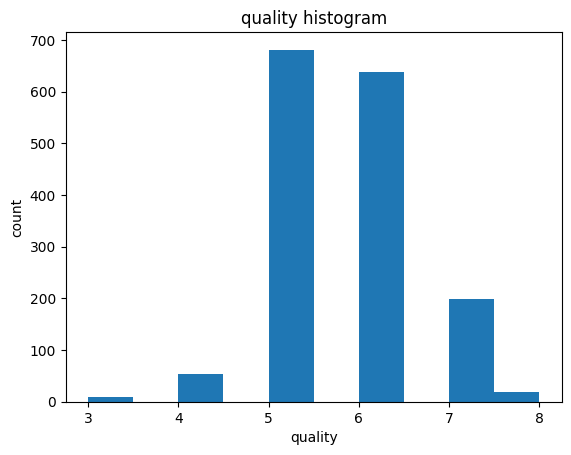

In [20]:
# plot histogram for quality
plt.hist(data['quality'])
plt.xlabel('quality')
plt.ylabel('count')
plt.title('quality histogram')
plt.show()

<Axes: >

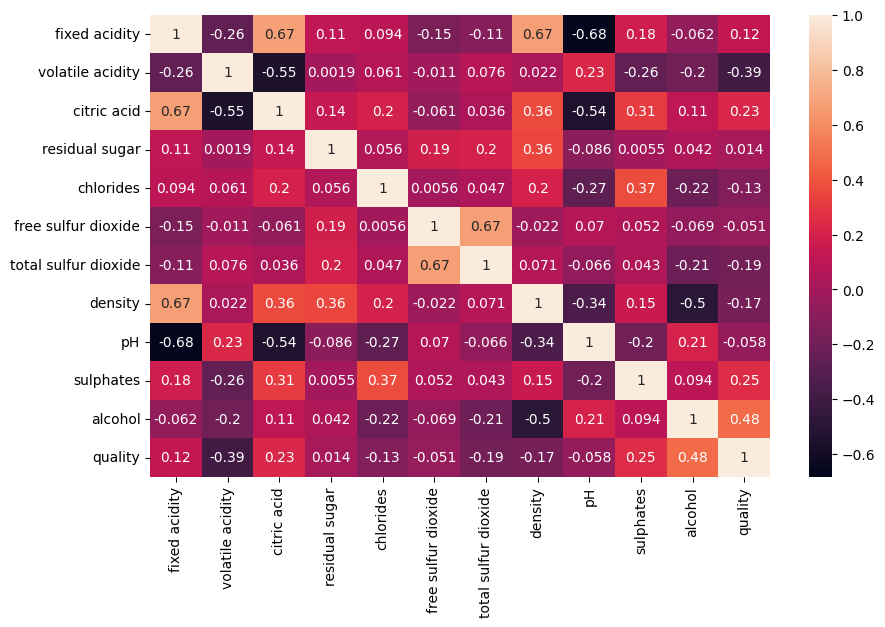

In [15]:

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data['quality'], data['fixed acidity'])


TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1000x600 with 0 Axes>

In [25]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict

In [26]:
from mlProject.constants import *
from mlProject.utils.common import read_yaml, create_directories

In [27]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir = config.unzip_data_dir,
            all_schema=schema,
        )

        return data_validation_config

In [28]:
import os
from mlProject import logger

In [29]:
class DataValiadtion:
    def __init__(self, config: DataValidationConfig):
        self.config = config


    def validate_all_columns(self)-> bool:
        try:
            validation_status = None

            data = pd.read_csv(self.config.unzip_data_dir)
            all_cols = list(data.columns)

            all_schema = self.config.all_schema.keys()

            
            for col in all_cols:
                if col not in all_schema:
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
                else:
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")

            return validation_status
        
        except Exception as e:
            raise e

In [30]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValiadtion(config=data_validation_config)
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2024-08-31 16:13:46,874: INFO: common: yaml file: config/config.yaml loaded successfully]
[2024-08-31 16:13:46,876: INFO: common: yaml file: params.yaml loaded successfully]
[2024-08-31 16:13:46,879: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-08-31 16:13:46,880: INFO: common: created directory at: artifacts]
[2024-08-31 16:13:46,880: INFO: common: created directory at: artifacts/data_validation]
